In [49]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [50]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
!ls

app.py
climate_analysis.ipynb
Resources


In [29]:
# reflect an existing database into a new model
base= automap_base()
# reflect the tables
base.prepare(engine)

In [31]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [35]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).first()
recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

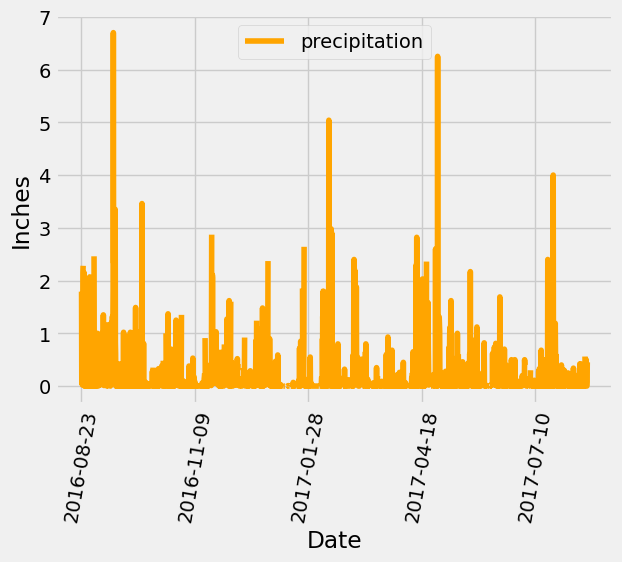

In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=("date", "precipitation"))

# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="date", y="precipitation", rot=80, color="orange")
plt.xlabel("Date")
plt.ylabel("Inches")


In [77]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [89]:
# Design a query to calculate the total number of stations in the dataset
# Calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).scalar()

total_stations


9

In [103]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active_stations = session.query(measurement.station, func.count(measurement.station)
).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

# Print the results
for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")


Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [105]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

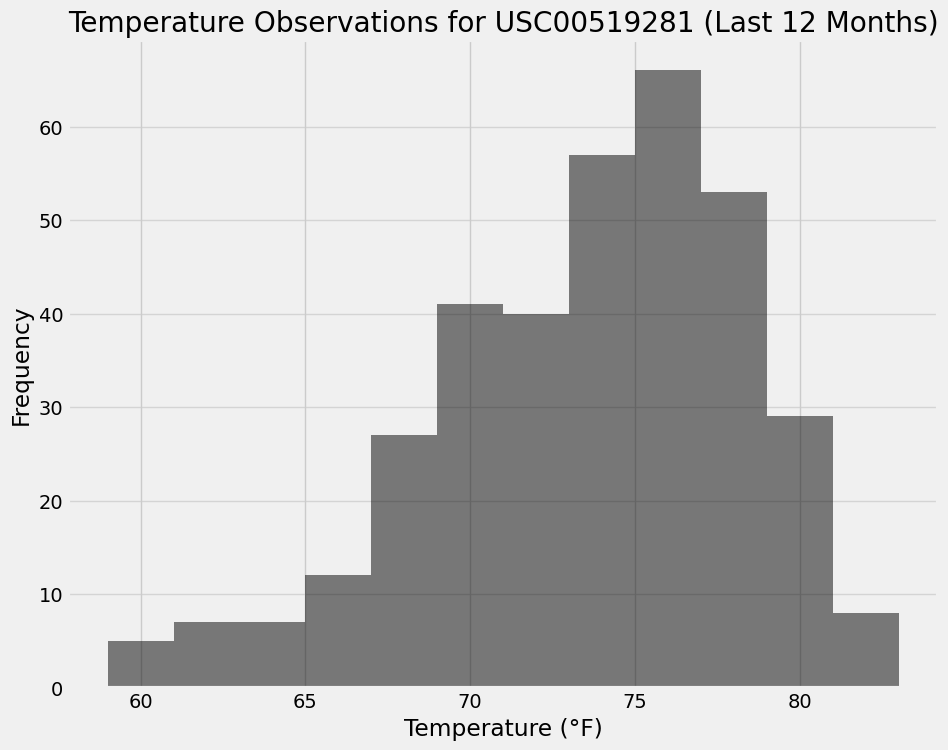

In [121]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.tobs).\
    filter(measurement.station == "USC00519281").\
    filter(measurement.date >= previous_year).all()

temperature_data = pd.DataFrame(results, columns=['tobs'])

plt.figure(figsize=(10, 8))
plt.hist(temperature_data['tobs'], bins=12, color='black', alpha=0.5)
plt.title('Temperature Observations for USC00519281 (Last 12 Months)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Close Session

In [123]:
# Close Session
session.close()